# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Koen Weverink (14711982) & Jasper Timmer (12854328)

Run the following cell to import NumPy and Pyplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [9]:
def classical_gram_schmidt(A):
    V = np.zeros_like(A)
    for index, X in enumerate(A):
        if index == 0:
            V[index] = X / np.linalg.norm(X)
        else:
            i = np.arange(index)
            V[index] = X - np.dot(X, V[i].T) @ V[i]
            V[index] /= np.linalg.norm(V[index])

    return V
    

def modified_gram_schmidt(A):
    V = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))

    for index, X in enumerate(A.T):
        i = np.arange(index)
        for j in i:
            R[j, index] = np.dot(V[:, j], A[:, index])
            X -= R[j, index] * V[:, j]

        R[index, index] = np.linalg.norm(X)
        V[:, index] = X / R[index, index]

    return V


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



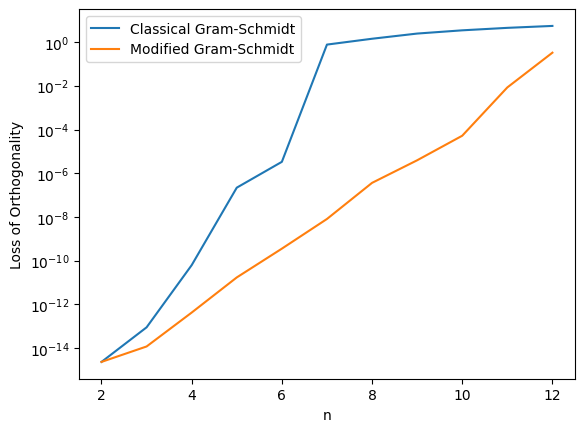

In [15]:
def loss_of_orthogonality(Q):
    return np.linalg.norm(np.eye(Q.shape[1]) - Q.T @ Q)


def study_qr_decompositions(n_range):
    loss_classical = []
    loss_modified = []
    loss_qr = []

    for n in n_range:
        H = np.array([[1 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

        # Classical Gram-Schmidt
        Q_classical = classical_gram_schmidt(H)
        loss_classical.append(loss_of_orthogonality(Q_classical))

        # Modified Gram-Schmidt
        Q_modified = modified_gram_schmidt(H)
        loss_modified.append(loss_of_orthogonality(Q_modified))

    plt.plot(n_range, loss_classical, label='Classical Gram-Schmidt')
    plt.plot(n_range, loss_modified, label='Modified Gram-Schmidt')
    plt.yscale('log')
    plt.xlabel('n')
    plt.ylabel('Loss of Orthogonality')
    plt.legend()
    plt.show()

# Set the range of n values
n_values = list(range(2, 13))

# Study the QR decompositions
study_qr_decompositions(n_values)

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


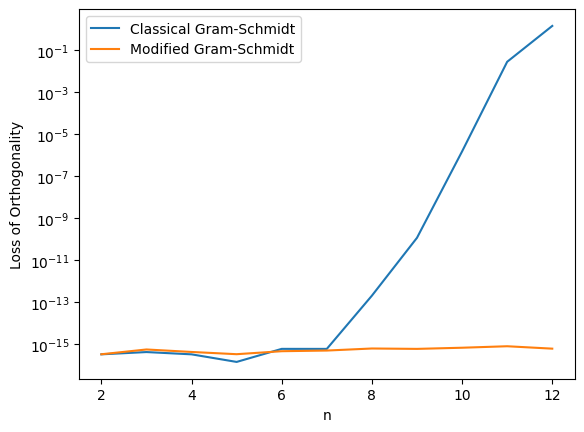

In [16]:
def study_qr_decompositions(n_range):
    loss_classical = []
    loss_modified = []
    loss_qr = []

    for n in n_range:
        H = np.array([[1 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

        # Classical Gram-Schmidt
        Q_classical = classical_gram_schmidt(classical_gram_schmidt(H))
        loss_classical.append(loss_of_orthogonality(Q_classical))

        # Modified Gram-Schmidt
        Q_modified = modified_gram_schmidt(modified_gram_schmidt(H))
        loss_modified.append(loss_of_orthogonality(Q_modified))

    plt.plot(n_range, loss_classical, label='Classical Gram-Schmidt')
    plt.plot(n_range, loss_modified, label='Modified Gram-Schmidt')
    plt.yscale('log')
    plt.xlabel('n')
    plt.ylabel('Loss of Orthogonality')
    plt.legend()
    plt.show()

# Set the range of n values
n_values = list(range(2, 13))

# Study the QR decompositions
study_qr_decompositions(n_values)

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [ ]:
def householder_qr(A):
    # YOUR CODE HERE

## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


In [ ]:
# YOUR CODE HERE